In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df= pd.read_csv(city_data_to_load)
ride_data_df= pd.read_csv(ride_data_to_load)

 #city_data_df = city_data_df.drop_duplicates('city')
# Combine the data into a single dataset
    
combined_data_df = pd.merge( ride_data_df,city_data_df, on="city",how="left")
combined_data_df

# Display the data table for preview
combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [10]:
#City summary

average_fare = combined_data_df.groupby("city")["fare"].mean()
average_fare.head()
total_rides=combined_data_df.groupby("city")["ride_id"].count()

total_drivers=combined_data_df.groupby("city")["driver_count"].mean()


city_type=city_data_df.set_index("city")["type"]
city_type.value_counts()

City_Summary = pd.DataFrame({"Average Fare":average_fare,
                              "Number of Rides":total_rides,
                               "Number of Drivers":total_drivers,
                               "City Type":city_type})
City_Summary.head()

,Average Fare,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


## Bubble Plot of Ride Sharing Data

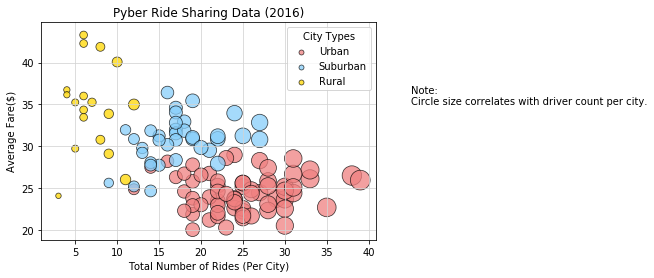

In [3]:
# Obtain the x and y coordinates for each of the three city types

urban=City_Summary.loc [City_Summary["City Type"]=="Urban"]
suburban=City_Summary.loc[City_Summary["City Type"]=="Suburban"]
rural=City_Summary.loc[City_Summary["City Type"]=="Rural"]

# Build the scatter plots for each city types

plt.scatter(urban["Number of Rides"], urban["Average Fare"], color = "lightcoral",marker="o",
            edgecolors="black", s = urban["Number of Drivers"]*10, label = "Urban",alpha = 0.75, linewidth =0.75)

plt.scatter(suburban["Number of Rides"], suburban["Average Fare"], color = "lightskyblue",marker="o",
            edgecolors="black", s =suburban["Number of Drivers"]*10, label = "Suburban",alpha = 0.75, linewidth =0.75)

plt.scatter(rural["Number of Rides"], rural["Average Fare"], color = "gold",marker="o",
            edgecolors="black", s = rural["Number of Drivers"]*10, label = "Rural", alpha = 0.75, linewidth = 0.75)

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

plt.grid(color='lightgrey', linestyle='-', linewidth=0.75)


# Create a legend
lgnd=plt.legend(["Urban", "Suburban", "Rural"], title="City Types", loc="best", numpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [25]
lgnd.legendHandles[1]._sizes = [25]
lgnd.legendHandles[2]._sizes = [25]

# Incorporate a text label regarding circle size
plt.text(45,35,"Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("ridesharing.png")
# Show plot
plt.show()

## Total Fares by City Type

In [4]:
# Calculate Type Percents

total_fare_by_type = combined_data_df.groupby(["type"])["fare"].sum()


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [5]:
total_fare_by_type.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

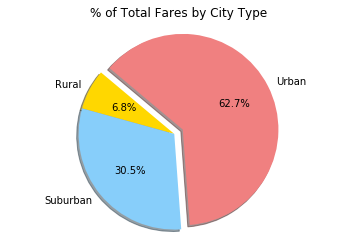

In [6]:
# Build Pie Chart

colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0, 0.1)

#Create the pie chart.
plt.pie(total_fare_by_type, labels = total_fare_by_type.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 140)

#Tell Matplotlib that we want a pie chart with equal axes.

plt.axis("equal")

#Add the title

plt.title('% of Total Fares by City Type')

# Save Figure

plt.savefig("piechart_fare.png")
# Show Figure

plt.show()

## Total Rides by City Type

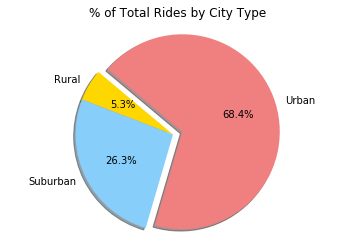

In [7]:
# Calculate Ride Percents

total_rides_by_type = combined_data_df.groupby(["type"])["ride_id"].count()
total_rides_by_type
total_rides_by_type.index

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0, 0.1)

#Create the pie chart.
plt.pie(total_rides_by_type, labels = total_rides_by_type.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 140)

#Tell Matplotlib that we want a pie chart with equal axes.

plt.axis("equal")

#Add the title

plt.title('% of Total Rides by City Type')

# Save Figure

plt.savefig("piechart_rides.png")
# Show Figure

plt.show()


## Total Drivers by City Type

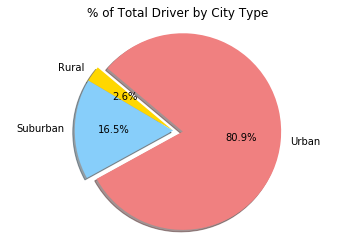

In [20]:
# Calculate Driver Percents


total_driver_by_type = city_data_df.groupby(["type"])["driver_count"].sum()
total_driver_by_type
total_driver_by_type.index

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0, 0.1)

#Create the pie chart.
plt.pie(total_driver_by_type, labels = total_driver_by_type.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 140)

#Tell Matplotlib that we want a pie chart with equal axes.

plt.axis("equal")

#Add the title

plt.title('% of Total Driver by City Type')

# Save Figure

plt.savefig("piechart_drivers.png")
# Show Figure

plt.show()
